# Nobel Prize Laureates in Physics

[Introduction](https://sites.google.com/site/introductiontodatasciencecsulb/home) to Data Science: [Homework 1](https://github.com/damienGitUserName/Intro-to-Data-Science/blob/master/Homework/Homework1/Homework1.ipynb)

## 1. Preparing the data
### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from httplib2 import Http
from bs4 import BeautifulSoup, SoupStrainer
from string import punctuation
import nltk
from nltk.corpus import stopwords
%matplotlib inline

### Getting the data (web scraping)

In [2]:
class Parser:
    
    def __init__(self, url):  
        http = Http()
        status, response = http.request(url)
        tables = BeautifulSoup(response, "lxml", 
                              parse_only=SoupStrainer("table", {"class":"wikitable sortable"}))
        self.table = tables.contents[1]
    
    def parse_table(self):      
        rows = self.table.find_all("tr")
        header = self.parse_header(rows[0])
        table_array = [self.parse_row(row) for row in rows[1:]]
        table_df = pd.DataFrame(table_array, columns=header).apply(self.clean_table, 1)
        return table_df.replace({"Year":{'':np.nan}})
        
    def parse_row(self, row):     
        columns = row.find_all("td")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != '']
    
    def parse_header(self, row):     
        columns = row.find_all("th")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != ""]
    
    def clean_table(self, row):
        if not row.iloc[0].isdigit() and row.iloc[0] != '':
            return row.shift(1)
        else:
            return row
        
url = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics"        
parser = Parser(url)   
nobel_df = parser.parse_table()
nobel_df.head(10)

,Year,Laureate[A],Country[B],Rationale[C]
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,NaN,Pieter Zeeman,Netherlands,None
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,NaN,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,NaN,Maria Skłodowska-Curie,Poland\n France,None
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


In [3]:
nobel_df.shape

(210, 4)

### Cleaning the data

In [4]:
# Cleaning the column headers
nobel_df.columns = ['Year', 'Laureate', 'Country', 'Rationale']

# Dropping all the rows where the nobel price was not awarded
nobel_df.dropna(axis = 0, subset = ['Country'], inplace = True)

# Fill the missing values in the year column (which corresponds to several laureates for a given year)
# ffill: propagate last valid observation forward to next valid observation
nobel_df.fillna(method = 'ffill', inplace = True)

nobel_df.head(10)

,Year,Laureate,Country,Rationale
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t..."
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p..."
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


In [5]:
nobel_df.shape

(204, 4)

Six rows were deleted corresponding to:
- 1916: Not awarded World War I
- 1931: Not awarded
- 1934: Not awarded
- 1940: Not awarded World War II
- 1941: Not awarded World War II
- 1942: Not awarded World War II

In [6]:
# Lets check that our data set does not contain missing values anymore
nobel_df.isnull().any()

Year         False
Laureate     False
Country      False
Rationale    False
dtype: bool

### 2. Analyzing the data

In [7]:
# How many physicists got a Nobel price?
physicist_number = nobel_df['Laureate'].nunique()

# How many countries are in this data set?
country_number =  nobel_df['Country'].nunique()

print(physicist_number)
print(country_number)

203
42


Between 1901 and 2016, 203 physicists from 42 different countries received a Nobel prize in physics. John Bardeen won the prize twice, in 1956 and 1972.

In [8]:
# Some physicists are associated with more than one country. Let's split the column "Country". 
nobel_df["Country_list"] = nobel_df["Country"].str.split('\n') 
nobel_df.head(10)

,Year,Laureate,Country,Rationale,Country_list
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ...",[Germany]
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands]
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands]
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit...",[France]
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p...",[France]
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]"
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom]
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom]
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the...","[United States, Poland]"


In [9]:
# Let's create a pandas series from this new column to facilitate the analysis. 
# Method 1: Using the sum on list to flatten the list of lists into one list of countries.
countries = pd.Series(sum(nobel_df["Country_list"].tolist(), [])).str.strip()
print(countries[:5])

0        Germany
1    Netherlands
2    Netherlands
3         France
4         France
dtype: object


In [10]:
# Method 2: Using a list comprehension
# We use .strip() because there are extra spaces in front of some countries
countries = [country.strip() for sub_country_list in nobel_df["Country_list"] for country in sub_country_list]
# Convert the list to a series
countries = pd.Series(data = countries)
# Drop the 'Country_list' column from the dataframe
del nobel_df['Country_list']
print(countries[:5])

0        Germany
1    Netherlands
2    Netherlands
3         France
4         France
dtype: object


In [11]:
# Number of physicists per country
countries.value_counts()

United States      94
United Kingdom     27
Germany            18
France             13
Japan              11
Netherlands        10
West Germany        9
Soviet Union        7
Russia              5
Switzerland         5
Italy               5
Poland              4
Sweden              4
Canada              4
Denmark             3
Austria             3
China               3
India               2
Hungary             2
Australia           2
Ireland             1
Austria-Hungary     1
Norway              1
Belgium             1
Pakistan            1
Hong Kong           1
dtype: int64

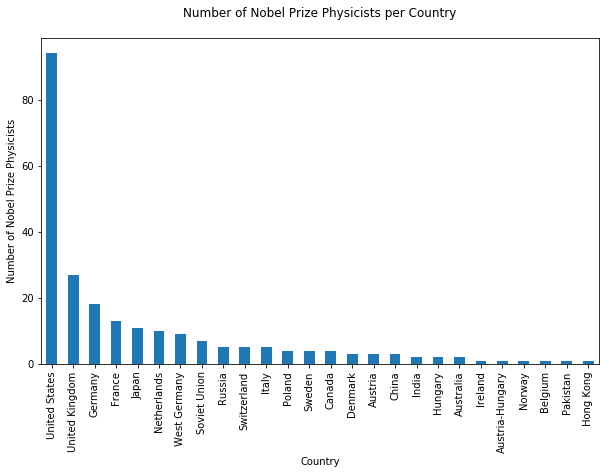

In [12]:
ax = countries.value_counts().plot(kind = 'bar', figsize = (10, 6), title = 'Number of Nobel Prize Physicists per Country\n')
ax.set_ylabel('Number of Nobel Prize Physicists')
ax.set_xlabel('Country')

### 3. Predicting the type of physics each physicist practices based on his/her Wikipedia page
#### Getting data on each physicist

In [13]:
# Getting the webpage links
http = Http()
status, response = http.request(url)

table = BeautifulSoup(response, "lxml", parse_only=SoupStrainer('table'))
link_df = pd.DataFrame([[x.string, x["href"]] for x in table.contents[1].find_all("a")],
                       columns=["Text", "Link"]).drop_duplicates()

link_df.head(10)

,Text,Link
0,[A],#endnote_1
1,[B],#endnote_2
2,[C],#endnote_3
3,None,/wiki/File:WilhelmR%C3%B6ntgen.JPG
4,Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen
5,Germany,/wiki/German_Empire
6,rays,/wiki/R%C3%B6ntgen_ray
7,[7],#cite_note-7
8,None,/wiki/File:H_A_Lorentz_(Nobel).jpg
9,Hendrik Lorentz,/wiki/Hendrik_Lorentz


In [14]:
# Let's join the two tables: nobel_df and link_df tables
# We use an inner join because we only want to keep the links related to the physicists names
nobel_merged_df =  nobel_df.merge(link_df, how = 'inner', left_on = 'Laureate', right_on = 'Text')
# Drop the 'Text' column from the merged dataframe
del nobel_merged_df['Text']
nobel_merged_df.head(10)

,Year,Laureate,Country,Rationale,Link
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ...",/wiki/Wilhelm_R%C3%B6ntgen
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t...",/wiki/Hendrik_Lorentz
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t...",/wiki/Pieter_Zeeman
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit...",/wiki/Henri_Becquerel
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p...",/wiki/Pierre_Curie
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p...",/wiki/Maria_Sk%C5%82odowska-Curie
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th...","/wiki/John_Strutt,_3rd_Baron_Rayleigh"
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]",/wiki/Philipp_Lenard
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig...",/wiki/J._J._Thomson
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the...",/wiki/Albert_Abraham_Michelson


In [15]:
nobel_merged_df.isnull().any()

Year         False
Laureate     False
Country      False
Rationale    False
Link         False
dtype: bool

In [16]:
# Define a function to extract the text associated with each link
def get_text(link, root_website = "https://en.wikipedia.org"):    
    http = Http()
    status, response = http.request(root_website + link)

    body = BeautifulSoup(response, "lxml", parse_only=SoupStrainer("div", {"id":"mw-content-text"}))
    return BeautifulSoup.get_text(body.contents[1])

In [17]:
# Extract the text of the Wikipedia page associated to each physicist
# Method 1: Using df.apply 
nobel_merged_df["Bio"] = nobel_merged_df['Link'].apply(get_text)
nobel_merged_df["Bio"].head(10)

0    \n\nWilhelm Röntgen\n\n\n\n\n\nBorn\nWilhelm C...
1    Not to be confused with Hendrikus Albertus Lor...
2    \n\nPieter Zeeman\n\n\n\n\n\nBorn\n(1865-05-25...
3    For other uses, see Becquerel (disambiguation)...
4    \n\nPierre Curie\n\n\n\n\n\nBorn\n(1859-05-15)...
5    This article is about the Polish physicist. Fo...
6    \n\nThe Lord Rayleigh\nOM PRS\n\n\n\n\n\nBorn\...
7    "Waterfall effect" redirects here. For the ill...
8    This article is about the Nobel laureate and p...
9    Not to be confused with the athlete Albert Mic...
Name: Bio, dtype: object

In [18]:
# Method 2: Using a comprehension
nobel_merged_df["Bio"] =  [get_text(link) for link in nobel_merged_df['Link']]
nobel_merged_df["Bio"].head(10)

0    \n\nWilhelm Röntgen\n\n\n\n\n\nBorn\nWilhelm C...
1    Not to be confused with Hendrikus Albertus Lor...
2    \n\nPieter Zeeman\n\n\n\n\n\nBorn\n(1865-05-25...
3    For other uses, see Becquerel (disambiguation)...
4    \n\nPierre Curie\n\n\n\n\n\nBorn\n(1859-05-15)...
5    This article is about the Polish physicist. Fo...
6    \n\nThe Lord Rayleigh\nOM PRS\n\n\n\n\n\nBorn\...
7    "Waterfall effect" redirects here. For the ill...
8    This article is about the Nobel laureate and p...
9    Not to be confused with the athlete Albert Mic...
Name: Bio, dtype: object

#### Cleaning the data

In [19]:
# Let's remove punctuation and numbers, and set every word to lower case
def clean_string(string):
    for p in punctuation + "0123456789":
        string = string.replace(p, '').lower()
    return string

# Let's apply this function to the "Bio" column
nobel_merged_df["Bio"] =  nobel_merged_df["Bio"].apply(clean_string)
nobel_merged_df["Bio"].head(10)

0    \n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...
1    not to be confused with hendrikus albertus lor...
2    \n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...
3    for other uses see becquerel disambiguation\n\...
4    \n\npierre curie\n\n\n\n\n\nborn\n may \nparis...
5    this article is about the polish physicist for...
6    \n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...
7    waterfall effect redirects here for the illuso...
8    this article is about the nobel laureate and p...
9    not to be confused with the athlete albert mic...
Name: Bio, dtype: object

In [20]:
# Let's split the "Bio" column as a column of lists of the words 
nobel_merged_df["Bio_list"] = nobel_merged_df['Bio'].str.split()
nobel_merged_df["Bio_list"].head(10)

0    [wilhelm, röntgen, born, wilhelm, conrad, rönt...
1    [not, to, be, confused, with, hendrikus, alber...
2    [pieter, zeeman, born, may, zonnemaire, nether...
3    [for, other, uses, see, becquerel, disambiguat...
4    [pierre, curie, born, may, paris, france, died...
5    [this, article, is, about, the, polish, physic...
6    [the, lord, rayleigh, om, prs, born, november,...
7    [waterfall, effect, redirects, here, for, the,...
8    [this, article, is, about, the, nobel, laureat...
9    [not, to, be, confused, with, the, athlete, al...
Name: Bio_list, dtype: object

In [21]:
# Let's define a function that removes 'None' elements from a list
def remove(list_to_clean, element_to_remove=[None, ""]):
    clean_list = [item for item in list_to_clean if item not in element_to_remove]
    return clean_list

# Let's apply this function to the "Bio_list" column
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio_list"].apply(remove)

In [22]:
# Let's clean the text further using the nltk library
nltk.download('stopwords')
words_to_remove = set(stopwords.words('english'))
print(len(words_to_remove))
nobel_merged_df["Bio_list"] = [remove(list_to_clean, element_to_remove = words_to_remove) 
                               for list_to_clean in nobel_merged_df["Bio_list"]]
nobel_merged_df["Bio_list"].head(10)

[nltk_data] Downloading package stopwords to C:\Users\Kim
[nltk_data]     Domptail\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
153


0    [wilhelm, röntgen, born, wilhelm, conrad, rönt...
1    [confused, hendrikus, albertus, lorentz, ludvi...
2    [pieter, zeeman, born, may, zonnemaire, nether...
3    [uses, see, becquerel, disambiguation, antoine...
4    [pierre, curie, born, may, paris, france, died...
5    [article, polish, physicist, uses, see, marie,...
6    [lord, rayleigh, om, prs, born, november, lang...
7    [waterfall, effect, redirects, illusory, visua...
8    [article, nobel, laureate, physicist, moral, p...
9    [confused, athlete, albert, michelsen, albert,...
Name: Bio_list, dtype: object

In [23]:
# Let's remove the words that have only one character
def remove_one(list_to_clean):
    clean_list = [item for item in list_to_clean if len(item) > 1]
    return clean_list

nobel_merged_df["Bio_list"] = [remove_one(list_to_clean) for list_to_clean in nobel_merged_df["Bio_list"]]
nobel_merged_df["Bio_list"].head(10)

0    [wilhelm, röntgen, born, wilhelm, conrad, rönt...
1    [confused, hendrikus, albertus, lorentz, ludvi...
2    [pieter, zeeman, born, may, zonnemaire, nether...
3    [uses, see, becquerel, disambiguation, antoine...
4    [pierre, curie, born, may, paris, france, died...
5    [article, polish, physicist, uses, see, marie,...
6    [lord, rayleigh, om, prs, born, november, lang...
7    [waterfall, effect, redirects, illusory, visua...
8    [article, nobel, laureate, physicist, moral, p...
9    [confused, athlete, albert, michelsen, albert,...
Name: Bio_list, dtype: object

In [24]:
# Let's remove all the words that appear too few times
def remove_n_occurrence(list_to_clean, n = 1):
    clean_list = [item for item in list_to_clean if list_to_clean.count(item) > n]
    return clean_list
 
nobel_merged_df["Bio_list"] = [remove_n_occurrence(list_to_clean) for list_to_clean in nobel_merged_df["Bio_list"]]
nobel_merged_df["Bio_list"].head(10)

0    [wilhelm, röntgen, born, wilhelm, conrad, rönt...
1    [lorentz, lorenz, see, also, lorentz, lorenz, ...
2    [pieter, zeeman, born, may, zonnemaire, nether...
3    [see, becquerel, antoine, henri, becquerel, he...
4    [pierre, curie, born, may, paris, france, died...
5    [polish, physicist, see, marie, curie, name, f...
6    [lord, rayleigh, om, prs, born, november, lang...
7    [waterfall, effect, motion, effect, see, motio...
8    [article, nobel, laureate, physicist, see, tho...
9    [albert, albert, michelson, born, december, st...
Name: Bio_list, dtype: object

In [25]:
# Let's keep each word only once
def remove_duplicates(list_to_clean):
    clean_list = frozenset(list_to_clean)
    return clean_list
    
nobel_merged_df["Bio_list"] = [remove_duplicates(list_to_clean) for list_to_clean in nobel_merged_df["Bio_list"]]
nobel_merged_df["Bio_list"].head(10)

0    (discovery, siegbahn, bardeen, adopted, first,...
1    (times, paper, first, contributions, formulati...
2    (discovery, well, theory, siegbahn, bardeen, f...
3    (discovery, spontaneous, salt, phosphorescence...
4    (discovery, electrometer, ed, times, siegbahn,...
5    (discovery, times, gerhard, paper, first, ferm...
6    (surface, siegbahn, theory, times, bardeen, gr...
7    (views, ed, absorption, theory, quantum, siegb...
8    (discovery, vortex, times, first, apparatus, c...
9    (first, influenced, fermi, ulysses, time, lamb...
Name: Bio_list, dtype: object

#### Getting data on each type of physics

[Wikipedia](https://en.wikipedia.org/wiki/Physics) identifies 6 contemporary research fields in physics:

- Nuclear physics
- Particle physics
- Atomic, molecular, and optical physics
- Condensed matter physics
- Astrophysics
- Physical_cosmology

Here is another alternative detailed ['Map of Physics'](https://www.youtube.com/watch?v=ZihywtixUYo&t=1s).

In [26]:
# Let's get the Wikipedia text from each type of physics
physics_df = pd.DataFrame({"Field": ["Nuclear physics",
                                     "Particle physics", 
                                     "Atomic, molecular, and optical physics", 
                                     "Condensed matter physics", 
                                     "Astrophysics",
                                     "Physical cosmology"],
                            "Link": ["/wiki/Nuclear_physics",
                                     "/wiki/Particle_physics", 
                                     "/wiki/Atomic,_molecular,_and_optical_physics", 
                                     "/wiki/Condensed_matter_physics", 
                                     "/wiki/Astrophysics",
                                     "/wiki/Physical_cosmology"]})

physics_df.set_index("Field", inplace=True)

physics_df["Text_data"] = [get_text(link) for link in physics_df['Link']]
physics_df["Text_data"].head(10)

Field
Nuclear physics                           This article is about the study of atomic nucl...
Particle physics                          For other uses of the word "particle" in physi...
Atomic, molecular, and optical physics    \n\nQuantum mechanics\n\n\n\n\n\n\n\n\n\nH\n^\...
Condensed matter physics                  \n\nCondensed matter physics\n\n\n\n\n\nPhases...
Astrophysics                              This article is about the use of physics and c...
Physical cosmology                        This article is about the branch of physics an...
Name: Text_data, dtype: object

In [27]:
# Let's tokenize and clean the text
physics_df["Text_data"] = physics_df["Text_data"].apply(clean_string)
physics_df["Text_data"] = physics_df["Text_data"].str.split()
physics_df["Text_data"] = physics_df["Text_data"].apply(remove)
physics_df["Text_data"] = physics_df["Text_data"].apply(remove_one)
physics_df["Text_data"] = physics_df["Text_data"].apply(remove_n_occurrence)
physics_df["Text_data"] = physics_df["Text_data"].apply(remove_duplicates)
physics_df["Text_data"].head(10)

Field
Nuclear physics                           (discovery, few, same, class, paper, unpaired,...
Particle physics                          (discovery, times, quarks, refer, fermi, first...
Atomic, molecular, and optical physics    (discovery, calculated, medical, time, phenome...
Condensed matter physics                  (discovery, first, fermi, renormalization, gla...
Astrophysics                              (discovery, few, same, first, include, medical...
Physical cosmology                        (discovery, few, same, times, first, eds, refe...
Name: Text_data, dtype: object

#### Predicting the type of physics each physicist practices based on his/her biography
For each physicist, let's compute the number of words in his/her biography that intersect with the physics fields pages.

In [28]:
def intersect_count(list1, list2):
    return len(set(list1).intersection(list2))

Fields = {"Nuclear physics": "Nuclear",
          "Particle physics": "Particle", 
          "Atomic, molecular, and optical physics": "Atomic", 
          "Condensed matter physics": "Condensed", 
          "Astrophysics": "Astrophysics",
          "Physical cosmology": "Cosmology"} 

for field in Fields:
    for laureate in nobel_merged_df.index:
        nobel_merged_df.loc[laureate, "Count_intersect_" + Fields[field]] = intersect_count(nobel_merged_df.loc[laureate, 'Bio_list'], 
                                                                       physics_df.loc[field, 'Text_data'])

nobel_merged_df

,Year,Laureate,Country,Rationale,Link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,Count_intersect_Atomic,Count_intersect_Condensed,Count_intersect_Astrophysics,Count_intersect_Cosmology
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ...",/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"(discovery, siegbahn, bardeen, adopted, first,...",46.0,49.0,36.0,59.0,46.0,60.0
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t...",/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"(times, paper, first, contributions, formulati...",92.0,112.0,84.0,131.0,88.0,128.0
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t...",/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"(discovery, well, theory, siegbahn, bardeen, f...",37.0,43.0,31.0,48.0,32.0,41.0
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit...",/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"(discovery, spontaneous, salt, phosphorescence...",42.0,40.0,28.0,48.0,38.0,44.0
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p...",/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"(discovery, electrometer, ed, times, siegbahn,...",55.0,55.0,42.0,74.0,52.0,65.0
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p...",/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"(discovery, times, gerhard, paper, first, ferm...",114.0,124.0,70.0,143.0,99.0,140.0
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th...","/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"(surface, siegbahn, theory, times, bardeen, gr...",41.0,45.0,40.0,68.0,47.0,61.0
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]",/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"(views, ed, absorption, theory, quantum, siegb...",61.0,57.0,49.0,80.0,57.0,75.0
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig...",/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"(discovery, vortex, times, first, apparatus, c...",108.0,108.0,81.0,131.0,93.0,120.0
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the...",/wiki/Albert_Abraham_Michelson,not to be confused with the athlete albert mic...,"(first, influenced, fermi, ulysses, time, lamb...",59.0,78.0,54.0,90.0,70.0,96.0


For each physicist, let's compute the total number of words contained in his biography and in each of the physics fields pages.

In [29]:
# Count the total number of words in two lists
def total_count(list1, list2):
    return len(set(list1)) + len(set(list2))

for field in Fields:
    for laureate in nobel_merged_df.index:
        nobel_merged_df.loc[laureate, "Count_total_" + Fields[field]] = total_count(nobel_merged_df.loc[laureate, 'Bio_list'], 
                                                                   physics_df.loc[field, 'Text_data'])

nobel_merged_df

,Year,Laureate,Country,Rationale,Link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,Count_intersect_Atomic,Count_intersect_Condensed,Count_intersect_Astrophysics,Count_intersect_Cosmology,Count_total_Nuclear,Count_total_Particle,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ...",/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"(discovery, siegbahn, bardeen, adopted, first,...",46.0,49.0,36.0,59.0,46.0,60.0,704.0,746.0,574.0,885.0,655.0,910.0
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t...",/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"(times, paper, first, contributions, formulati...",92.0,112.0,84.0,131.0,88.0,128.0,948.0,990.0,818.0,1129.0,899.0,1154.0
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t...",/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"(discovery, well, theory, siegbahn, bardeen, f...",37.0,43.0,31.0,48.0,32.0,41.0,627.0,669.0,497.0,808.0,578.0,833.0
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit...",/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"(discovery, spontaneous, salt, phosphorescence...",42.0,40.0,28.0,48.0,38.0,44.0,676.0,718.0,546.0,857.0,627.0,882.0
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p...",/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"(discovery, electrometer, ed, times, siegbahn,...",55.0,55.0,42.0,74.0,52.0,65.0,706.0,748.0,576.0,887.0,657.0,912.0
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p...",/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"(discovery, times, gerhard, paper, first, ferm...",114.0,124.0,70.0,143.0,99.0,140.0,1321.0,1363.0,1191.0,1502.0,1272.0,1527.0
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th...","/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"(surface, siegbahn, theory, times, bardeen, gr...",41.0,45.0,40.0,68.0,47.0,61.0,709.0,751.0,579.0,890.0,660.0,915.0
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]",/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"(views, ed, absorption, theory, quantum, siegb...",61.0,57.0,49.0,80.0,57.0,75.0,693.0,735.0,563.0,874.0,644.0,899.0
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig...",/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"(discovery, vortex, times, first, apparatus, c...",108.0,108.0,81.0,131.0,93.0,120.0,950.0,992.0,820.0,1131.0,901.0,1156.0
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the...",/wiki/Albert_Abraham_Michelson,not to be confused with the athlete albert mic...,"(first, influenced, fermi, ulysses, time, lamb...",59.0,78.0,54.0,90.0,70.0,96.0,887.0,929.0,757.0,1068.0,838.0,1093.0


In [30]:
# We can now drop the Link, Bio and Bio_list columns
del nobel_merged_df['Link']
del nobel_merged_df['Bio']
del nobel_merged_df['Bio_list']

For each physicist, we can now compute the Jaccard index ('Intersection over Union') for words to be in both the physicist page and each physics field.

In [31]:
for field in Fields:
    nobel_merged_df["Proba_" + Fields[field]] 
    = nobel_merged_df["Count_intersect_" + Fields[field]] / nobel_merged_df["Count_total_" + Fields[field]]
    
nobel_merged_df

SyntaxError: invalid syntax (<ipython-input-31-3c6a7ca874ee>, line 3)

In [ ]:
# We can now drop the Count_intersect and Count_total columns

for field in Fields:
    del nobel_merged_df["Count_intersect_" + Fields[field]]
    del nobel_merged_df["Count_total_" + Fields[field]]

In [ ]:
# We normalize the probability to 1

proba_cols = ["Proba_Nuclear",
              "Proba_Particle",
              "Proba_Atomic",
              "Proba_Condensed",
              "Proba_Astrophysics",
              "Proba_Cosmology"]

nobel_merged_df[proba_cols] = nobel_merged_df[proba_cols].apply(lambda x: x / sum(x), 1)

In [ ]:
# Let's identify each physicist field based on the highest Jaccard index
nobel_merged_df['Predicted Field'] = nobel_merged_df[proba_cols].idxmax(axis=1)

# We can now drop the Proba columns
for col in proba_cols:
    del nobel_merged_df[col]

nobel_merged_df

#### Discussion:

- The majority of the physicists seem to have been properly classified, for example:
    - Henri Becquerel (1903), 'the first person to discover evidence of radioactivity', was properly classified in the field of Nuclear physics. 	
    - Van der Waals	(1910), 'famous for his work on an equation of state for gases and liquids', was properly classified in the field of Condensed matter physics.
    - Lev Davidovich Landau (1962), who won the prize 'for his pioneering theories for condensed matter, especially liquid helium', was properly classified in the field of Condensed matter physics.


- However, some physicists have arguably been improperly classified, for example:
    - Niels Bohr (1922), 'who made foundational contributions to understanding atomic structure and quantum theory', should be classified as Atomic physics, rather than Condensed matter.


- Several physicists, who received a Nobel Prize together, were not classified in the same field of physics, for example:
    - Lorentz (condensed) and Zeeman (particle) in 1902
    - Becquerel (nuclear) and Curie (condensed) in 1903
    - Marconi (condensed) and Braun (astrophysics) in 1909
    - Mather (astrophysics) and Smoot (cosmology) in 2006


- This may be due to the fact that:
    - Some fields are very close to each other: Particle physics and Nuclear physics, Astrophysics and Cosmology.
    - Physicists may be working in different fields throughout their careers.

#### Next steps:

Potential methods to improve the classification include:
- Adjust the n parameter in the remove_n_occurrence function. The Wikipedia pages of some physicists are relatively short and it might be better to keep all the words even if they only appear once in the biography. 
- Include more stopwords to remove. For example, the default [list](http://www.ranks.nl/stopwords) of full-text stopwords used by MySQL includes 540+ words, while there are only 153 stopwords in nltk default list.
- Conduct the same analysis in other languages (for any language in which all the Wikipedia pages exist). Wikipedia pages are not directly translated from one language to another but rather written directly in each language by different people.
- For a given physicist, attribute a heavier weight to a field when the name of the physicist is in the Wikipedia page of that field.
- For each physicist, retrieve the text from the publications listed on their Wikipedia page to complement their biographies.